# <center><b> MGP DL1 : Patient Survival Classification Project <b></center>

---
<a name = Section0></a>
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  - **3.1** [**Version Check**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Description**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Handling of Missing Data**](#Section52)<br>
  - **5.3** [**Handling of Redundant Data**](#Section53)<br>
  - **5.4** [**Handling of Inconsisten Data**](#Section54)<br>
  - **5.5** [**Handling of Outliers**](#Section55)<br>
  
**6.** [**Exploratory Data Analysis**](#Section6)<br>
   
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation using Deep Learning**](#Section8)<br>

**9.** [**Saving and loading the keras model**](#Section9)<br>

**10.** [**Explainable AI**](#Section10)<br>

**11.** [**Hyperparameter Tuning**](#Section11)<br>

**12.** [**Model Development & Evaluation using Logistic Regression**](#Section12)<br>

**13.** [**Hyperparameter Tuning**](#Section13)<br>


---
<a name = Section1></a>
# **1. Introduction**
---


- This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. 

- All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms. 

---
<a name = Section1></a>
# **2. Problem Statement**
---


- The target feature is Accident_severity which is a multi-class variable. 

- The task is to classify this variable based on the other 31 features step-by-step by going through each day's task.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**                                                   
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
#!pip install -q pandas-profiling 

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
#!pip install -q --upgrade datascience                               
#!pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [1]:
import numpy as np
from numpy import isnan
import pandas as pd
from pandas_profiling import ProfileReport     
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter  
import seaborn as sns
import warnings                                                     
warnings.filterwarnings("ignore")
import datetime
plt.show();
from platform import python_version
import sklearn.metrics
from tqdm import tqdm
import gc
from sklearn.metrics import roc_curve, auc
import urllib
from urllib.request import urlopen
import urllib.request as ur

In [2]:
pd.set_option('display.max_columns', None)                          
pd.set_option('display.max_rows', None)                             
pd.set_option('mode.chained_assignment', None)   

In [3]:
from sklearn.preprocessing import StandardScaler                    
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV              
from sklearn.metrics import classification_report                   
from sklearn.metrics import plot_confusion_matrix                   
#import pydotplus                                                    
from IPython.display import Image                                   
from sklearn.metrics import accuracy_score                          
from sklearn.metrics import precision_score                         
from sklearn.metrics import recall_score                            
from sklearn.metrics import precision_recall_curve                  
from sklearn.metrics import confusion_matrix                        
from sklearn.metrics import f1_score                                  
from sklearn.metrics import roc_curve                               
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split                   
from sklearn.linear_model import LogisticRegression                 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel       
from sklearn.ensemble import RandomForestClassifier               
from yellowbrick.model_selection import FeatureImportances  
from imblearn.over_sampling import SMOTE

<a name = Section31></a>
### **3.2 Version Check**

In [4]:
# Printing versions of Python and other packages  to ensure correct version is used for this project
print("python version", python_version())
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)

python version 3.7.12
pandas version 1.3.5
numpy version 1.20.3
seaborn version 0.11.2
sklearn version 1.0.1


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


In [5]:
# loading the data set
df = pd.read_csv("../input/psdataset/Dataset.csv")
df = df.replace([' ', '?', "", '-','|','#','@','!'], value=np.nan)
df.head()

encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 1  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.541667                   0    73.9             2.3   
1          0.927778                   0    70.2             NaN   
2          0.000694                   0    95.3             NaN   
3          0.000694                   0    61.7             NaN   
4          0.073611                   0     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.4        31.0               2.51          NaN   
1               NaN         9.0               0.56          1.0   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN          0.6   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache

<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [7]:
df.shape

(91713, 186)

<a name = Section42></a>
### 4.2 Data Description 

- In this section we will get **information about the data** and see some observations.          

In [9]:
df.describe().style.highlight_null(null_color = 'lime')

In [ ]:
df.describe(include="object")

**Observations:**

- Total count/ records are  **91713** in the data.

- There are quite a no of   missing values in various columns.

In [10]:
# Only for columns of train data set
#df.columns = df.columns.str.lower().str.replace(' ', '_')

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

profile1 = ProfileReport(df=df)
profile1.to_file(output_file='RTA-PRE-Profiling Report.html')
print('Accomplished!')

<a name = Section52></a>
### **5.2  Handling of Missing Data**

- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

In [11]:
# Check for any missing values
print(any(df.isna().sum()))

True


**Observations:**
-  Looks like there are missing values in the  dataset.

In [12]:
# Check for any missing values
#print(df[df.isna().any(axis=1)])
print(len(df[df.isna().any(axis=1)]))

91688


**Observations:**

-  As we had observed there are missing values in the events dataset. 
- There are approx 9427 missing values in the entire dataset.

In [13]:
null_frame = pd.DataFrame(index = df.columns.values)
null_frame['Null Frequency'] = df.isnull().sum().values
percent = df.isnull().sum().values/df.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

encounter_id  patient_id  hospital_id  hospital_death  \
Null Frequency           0.0         0.0          0.0             0.0   
Missing %age             0.0         0.0          0.0             0.0   

                    age      bmi  elective_surgery  ethnicity  gender  \
Null Frequency  4228.00  3429.00               0.0    1395.00   25.00   
Missing %age       4.61     3.74               0.0       1.52    0.03   

                 height  hospital_admit_source  icu_admit_source  icu_id  \
Null Frequency  1334.00               21409.00            112.00     0.0   
Missing %age       1.45                  23.34              0.12     0.0   

                icu_stay_type  icu_type  pre_icu_los_days  readmission_status  \
Null Frequency            0.0       0.0               0.0                 0.0   
Missing %age              0.0       0.0               0.0                 0.0   

                 weight  albumin_apache  apache_2_diagnosis  \
Null Frequency  2720.00        54379.00             1662.00   
Missing %age       2.97           59.29                1.81   

                apache_3j_diagnosis  apache_post_operative  arf_apache  \
Null Frequency               1101.0                    0.0      715.00   
Missing %age                    1.2                    0.0        0.78   

                bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
Null Frequency          58134.00     19262.0           18853.00     70868.00   
Missing %age               63.39        21.0              20.56        77.27   

                gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
Null Frequency          1901.00           1901.00            1037.00   
Missing %age               2.07              2.07               1.13   

                gcs_verbal_apache  glucose_apache  heart_rate_apache  \
Null Frequency            1901.00        11036.00             878.00   
Missing %age                 2.07           12.03               0.96   

                hematocrit_apache  intubated_apache  map_apache  paco2_apache  \
Null Frequency           19878.00            715.00      994.00      70868.00   
Missing %age                21.67              0.78        1.08         77.27   

                paco2_for_ph_apache  pao2_apache  ph_apache  resprate_apache  \
Null Frequency             70868.00     70868.00   70868.00          1234.00   
Missing %age                  77.27        77.27      77.27             1.35   

                sodium_apache  temp_apache  urineoutput_apache  \
Null Frequency       18600.00      4108.00            48998.00   
Missing %age            20.28         4.48               53.43   

                ventilated_apache  wbc_apache  d1_diasbp_invasive_max  \
Null Frequency             715.00     22012.0                67984.00   
Missing %age                 0.78        24.0                   74.13   

                d1_diasbp_invasive_min  d1_diasbp_max  d1_diasbp_min  \
Null Frequency                67984.00         165.00         165.00   
Missing %age                     74.13           0.18           0.18   

                d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  \
Null Frequency                    1040.00                    1040.00   
Missing %age                         1.13                       1.13   

                d1_heartrate_max  d1_heartrate_min  d1_mbp_invasive_max  \
Null Frequency            145.00            145.00              67777.0   
Missing %age                0.16              0.16                 73.9   

                d1_mbp_invasive_min  d1_mbp_max  d1_mbp_min  \
Null Frequency              67777.0      220.00      220.00   
Missing %age                   73.9        0.24        0.24   

                d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  \
Null Frequency                 1479.00                 1479.00   
Missing %age                      1.61                    1.61   

                d1_resprate_max  d1_resprate_min  d1_spo2_max 

**Observations:**
- Total % for missing values in state, longitude and latitude column is around 1 % and we fill the na values.

In [14]:
# Stats of dataframe
stats    = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature  Unique_values  \
131               h1_bilirubin_min            181   
130               h1_bilirubin_max            181   
148                 h1_lactate_max            547   
149                 h1_lactate_min            536   
128                 h1_albumin_max             37   
129                 h1_albumin_min             37   
173           h1_pao2fio2ratio_min           3122   
172           h1_pao2fio2ratio_max           3142   
168             h1_arterial_ph_max            561   
169             h1_arterial_ph_min            579   
140                    h1_hco3_max            214   
141                    h1_hco3_min            198   
167           h1_arterial_pco2_min            768   
166           h1_arterial_pco2_max            779   
156                     h1_wbc_max           2075   
157                     h1_wbc_min           2072   
170            h1_arterial_po2_max           1737   
171            h1_arterial_po2_min           1729   
134                 h1_calcium_max             59   
135                 h1_calcium_min             62   
150               h1_platelets_max            544   
151               h1_platelets_min            545   
132                     h1_bun_max            258   
133                     h1_bun_min            258   
136              h1_creatinine_max            784   
137              h1_creatinine_min            777   
73          h1_diasbp_invasive_min             86   
72          h1_diasbp_invasive_max            103   
90           h1_sysbp_invasive_max            181   
91           h1_sysbp_invasive_min            168   
81             h1_mbp_invasive_min            133   
80             h1_mbp_invasive_max            247   
144              h1_hematocrit_max            358   
145              h1_hematocrit_min            361   
143              h1_hemaglobin_min            124   
142              h1_hemaglobin_max            124   
155                  h1_sodium_min            113   
154                  h1_sodium_max             99   
152               h1_potassium_max            115   
153               h1_potassium_min            113   
38                     pao2_apache           2003   
39                       ph_apache            555   
37             paco2_for_ph_apache            704   
36                    paco2_apache            704   
26                     fio2_apache             82   
118                 d1_lactate_max            704   
119                 d1_lactate_min            486   
47          d1_diasbp_invasive_min             85   
46          d1_diasbp_invasive_max            145   
65           d1_sysbp_invasive_min            163   
64           d1_sysbp_invasive_max            225   
54             d1_mbp_invasive_max            285   
55             d1_mbp_invasive_min            118   
165           d1_pao2fio2ratio_min           4990   
164           d1_pao2fio2ratio_max           5194   
160             d1_arterial_ph_max            527   
161             d1_arterial_ph_min            624   
158           d1_arterial_pco2_max            831   
159           d1_arterial_pco2_min            674   
163            d1_arterial_po2_min           1822   
162            d1_arterial_po2_max           2428   
23                bilirubin_apache            362   
146                     h1_inr_max            481   
147                     h1_inr_min            393   
117                     d1_inr_min            393   
116                     d1_inr_max            481   
18                  albumin_apache             35   
100               d1_bilirubin_max            374   
101               d1_bilirubin_min            357   
139                 h1_glucose_min            588   
138                 h1_glucose_max            601   
98                  d1_albumin_max             35   
99                  d1_albumin_min             35   
43              urineoutput_apache          24772   
45                      wbc_apache           3075   

**Observations:**

-  There are missing values in the  dataset. Now lets check for redundant data, if any.

In [15]:
for c in df.select_dtypes(exclude=['object', 'datetime64[ns]']):
    print("col is",c)
    if df[c].isna().sum() != 0:
        #print(c)
        med_c = df[c].median()
        print(med_c)
        df[c]=df[c].replace(to_replace=np.nan, value=med_c)
        decimals = 2    
        df[c] = df[c].apply(lambda x: round(x, decimals))
    else:
        decimals = 2    
        df[c] = df[c].apply(lambda x: round(x, decimals))

col is encounter_id
col is patient_id
col is hospital_id
col is hospital_death
col is age
65.0
col is bmi
27.65465458
col is elective_surgery
col is height
170.1
col is icu_id
col is pre_icu_los_days
col is readmission_status
col is weight
80.3
col is albumin_apache
2.9
col is apache_2_diagnosis
122.0
col is apache_3j_diagnosis
409.02
col is apache_post_operative
col is arf_apache
0.0
col is bilirubin_apache
0.6
col is bun_apache
19.0
col is creatinine_apache
0.98
col is fio2_apache
0.5
col is gcs_eyes_apache
4.0
col is gcs_motor_apache
6.0
col is gcs_unable_apache
0.0
col is gcs_verbal_apache
5.0
col is glucose_apache
133.0
col is heart_rate_apache
104.0
col is hematocrit_apache
33.2
col is intubated_apache
0.0
col is map_apache
67.0
col is paco2_apache
40.0
col is paco2_for_ph_apache
40.0
col is pao2_apache
103.5
col is ph_apache
7.36
col is resprate_apache
28.0
col is sodium_apache
138.0
col is temp_apache
36.5
col is urineoutput_apache
1386.2016
col is ventilated_apache
0.0
col is 

In [16]:
for co in df.select_dtypes(include=['object']):
    #print("col is",co)
    if df[co].isna().sum() != 0:
        #print("insideif loop", co)
        med_co = df[co].mode()[0]
        #print(med_co)
        df[co]=df[co].replace(to_replace=np.nan, value=med_co) 

In [17]:
df.isna().sum()

encounter_id                     0
patient_id                       0
hospital_id                      0
hospital_death                   0
age                              0
bmi                              0
elective_surgery                 0
ethnicity                        0
gender                           0
height                           0
hospital_admit_source            0
icu_admit_source                 0
icu_id                           0
icu_stay_type                    0
icu_type                         0
pre_icu_los_days                 0
readmission_status               0
weight                           0
albumin_apache                   0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
bilirubin_apache                 0
bun_apache                       0
creatinine_apache                0
fio2_apache                      0
gcs_eyes_apache                  0
gcs_motor_apache    

<a name = Section53></a>
### **5.3 Handling of Redundant Data**

- In this section, we will identify redundant data and check the proportion of it and take appropriate measures.

In [18]:
#check if any duplicate row
print('Data has duplicate Rows?', df.duplicated().any())

Data has duplicate Rows? False


In [19]:
#To get the total count of duplicate values.
df.duplicated().sum()

0

In [20]:
# We will start by first removing the duplicate rows if there are any
if df.duplicated().any() : 
    df.drop_duplicates(keep="first", inplace=True)

<a name = Section54></a>
### **5.4 Handling of Inconsistent Data**

- In this section, we will **identify inconsistency** in data and and then **take appropriate measures**.

- Previously, we observed that **Timestamp** feature was **incorrectly indentified** as Object, so, we will rectify it.

- Additionally, we can observe that some features are having language of different format such as brand and model.

In [ ]:
df.columns

In [21]:
# Get list of categorical variables,date  and numerical variables for the data set
catcol=[col for col in df.columns if df[col].dtype == "object"]
print("Categorical cols of dataset = ", catcol, ". No of categorical features = ", len(catcol))
print("**********************************************************\n")
datecol=[col for col in df.columns if df[col].dtype == "datetime64[ns]"]
print("DateTime cols of dataset = ", datecol, ". No of datetime features = ", len(datecol))
print("**********************************************************\n")
numcol = [col for col in df.columns if (df[col].dtype != "object") & (df[col].dtype != "datetime64[ns]")]
print("Numerical cols of dataset = ", numcol, ". No of numerical features = ", len(numcol))

Categorical cols of dataset =  ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem'] . No of categorical features =  8
**********************************************************

DateTime cols of dataset =  [] . No of datetime features =  0
**********************************************************

Numerical cols of dataset =  ['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apac

In [22]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [23]:
# Learn more about the variable brand.
print("Distinct responses for hospital_death (Frequency):", len(set(df['hospital_death'])))
print("Distinct responses for hospital_death:", set(df['hospital_death']))  

Distinct responses for hospital_death (Frequency): 2
Distinct responses for hospital_death: {0, 1}


**Observations:**

-  There are no 2 type of hospital_death

In [24]:
gc.collect()

274

In [25]:
df[df['hospital_death']==0]['gender'].value_counts()

M    45310
F    38488
Name: gender, dtype: int64

In [26]:
pd.crosstab(index=df['hospital_death'], columns=df['gender'])

gender              F      M
hospital_death              
0               38488  45310
1                3731   4184

<Figure size 576x396 with 0 Axes>

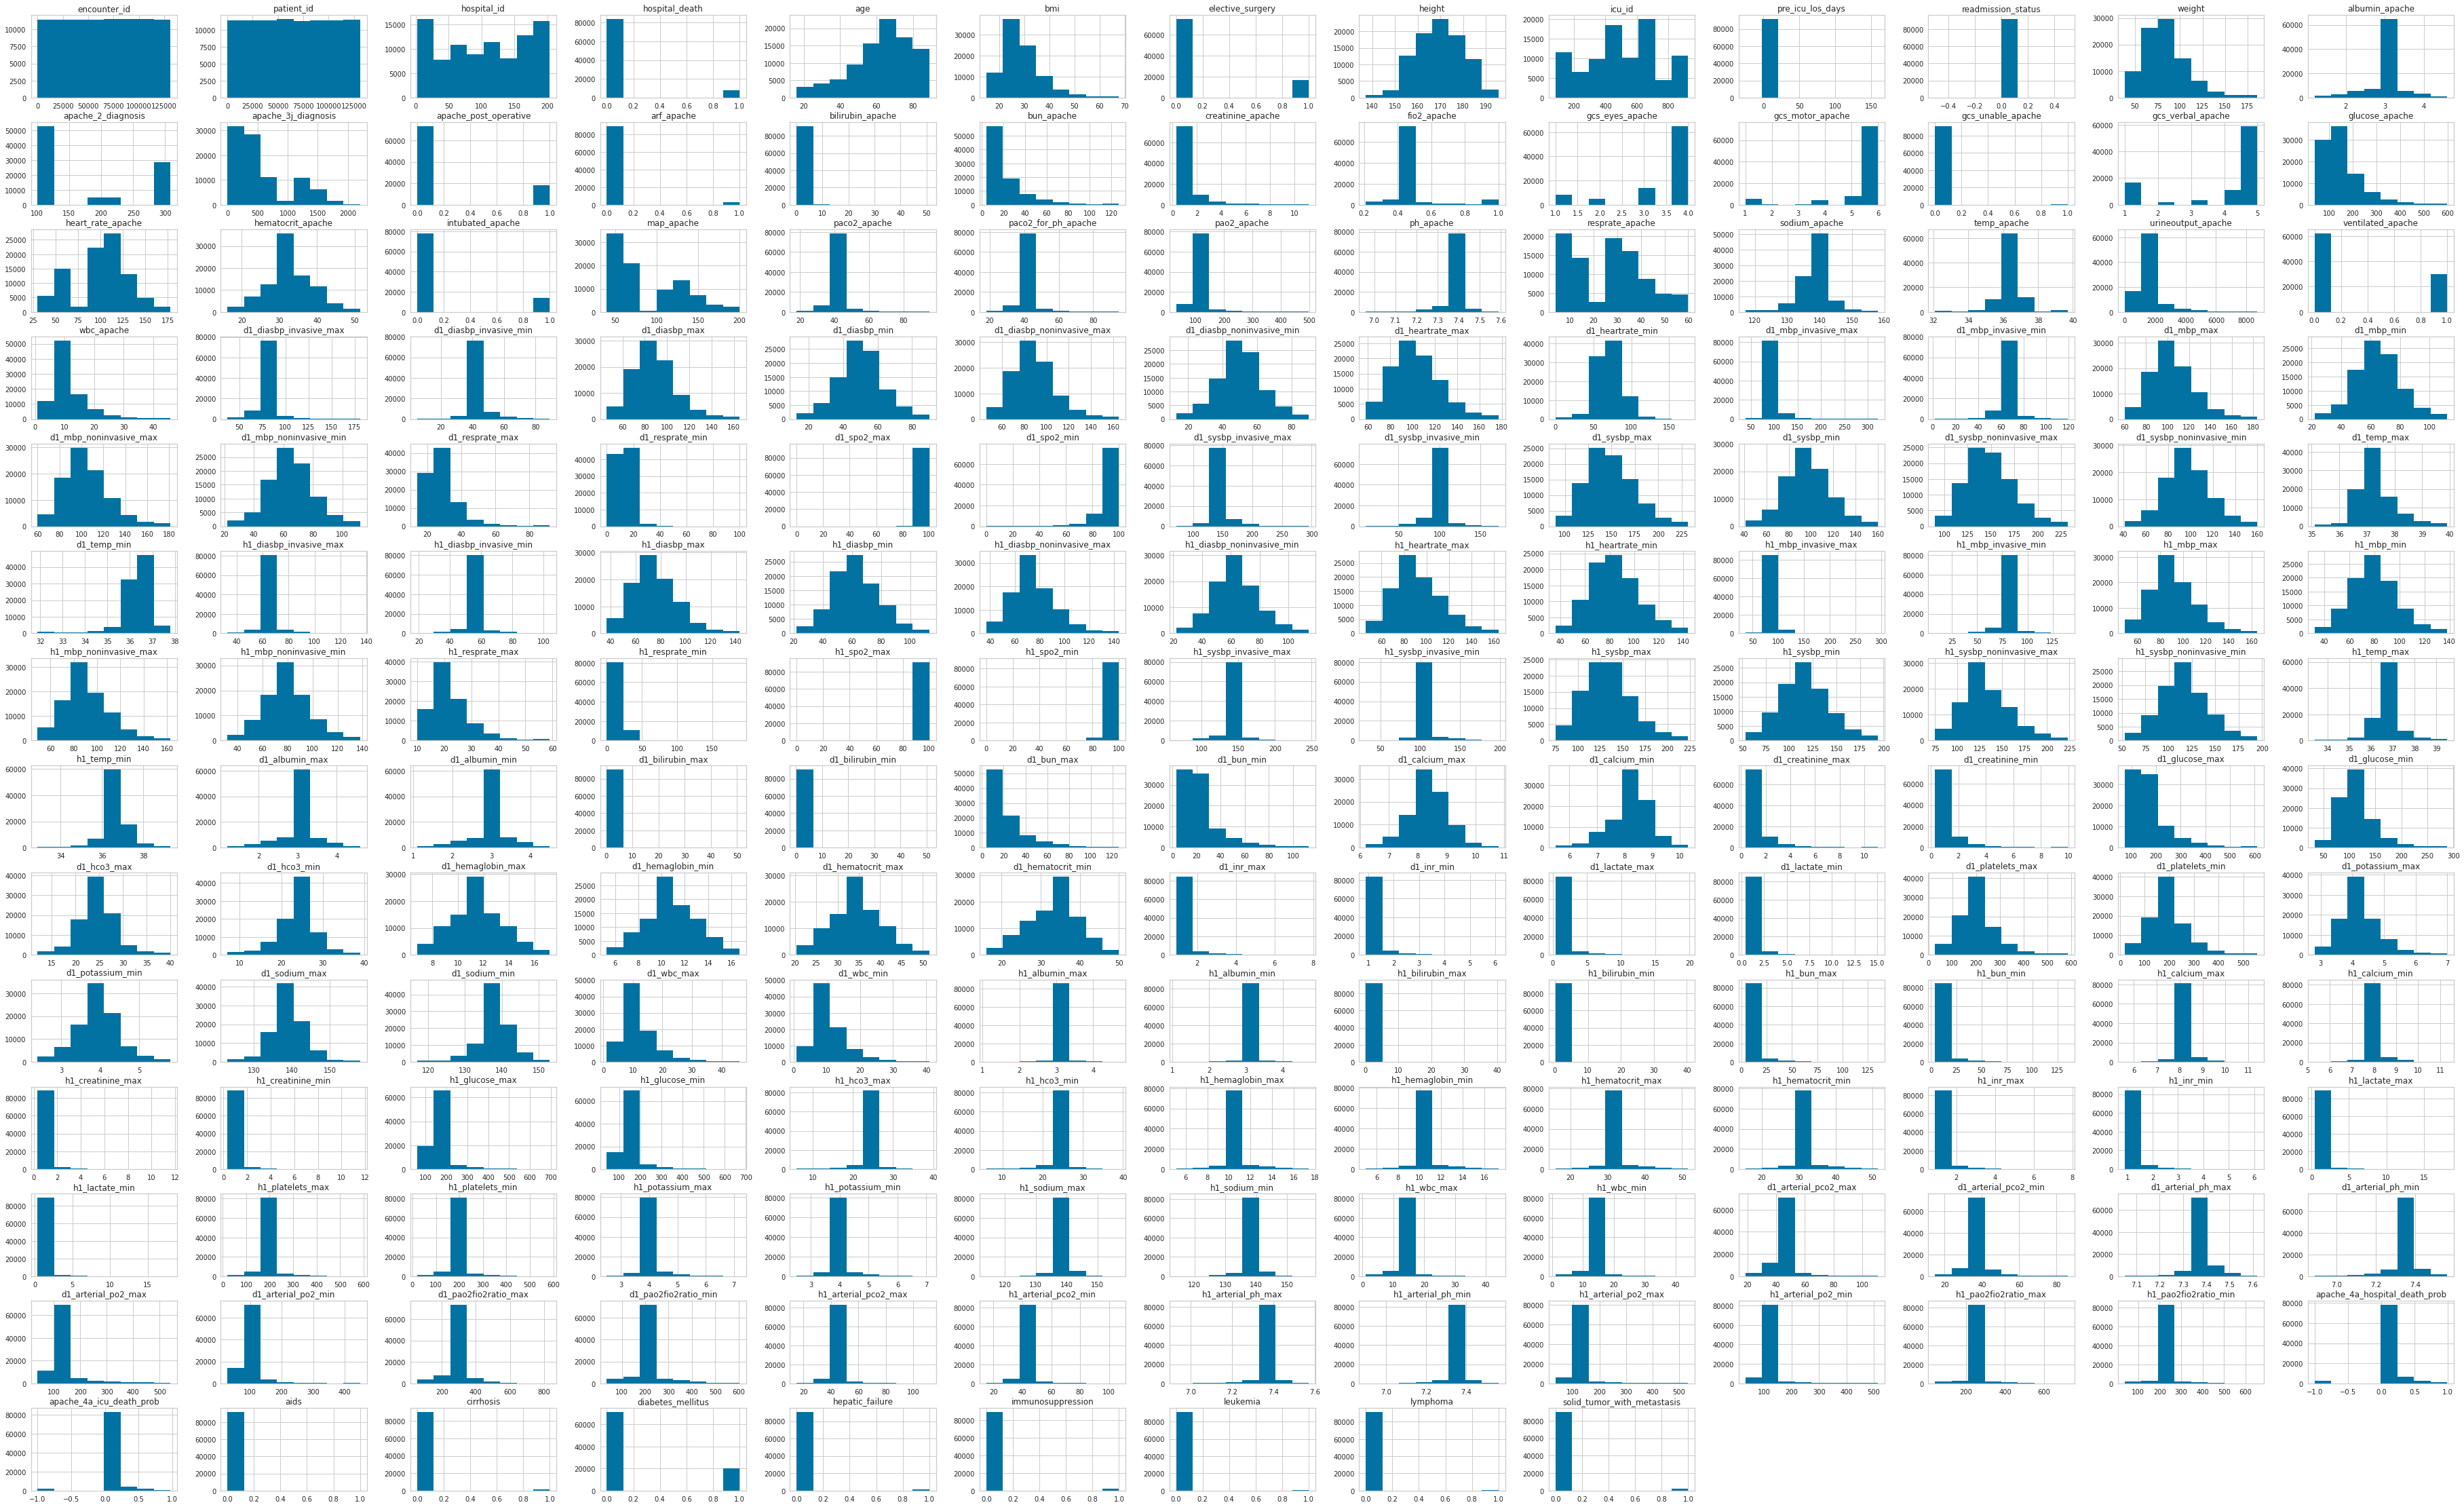

In [27]:
# checking the distribution 
plt.suptitle('Hist plots for the data set',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=20)
df.hist(figsize=(64, 40), bins=8)
plt.show()

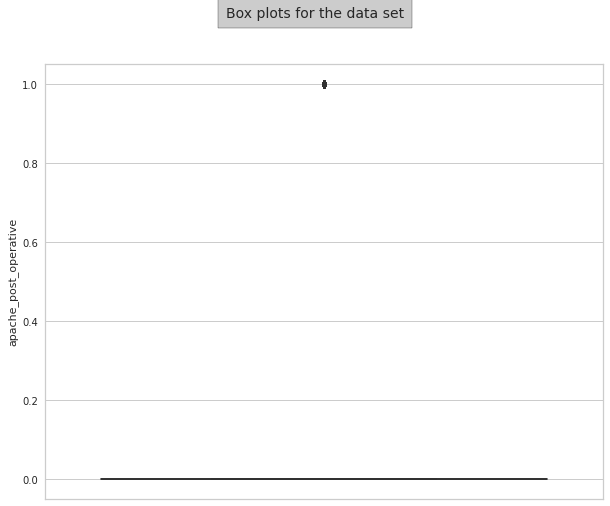

In [28]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(data=df, y='apache_post_operative')
fig.suptitle('Box plots for the data set', bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)
plt.show()

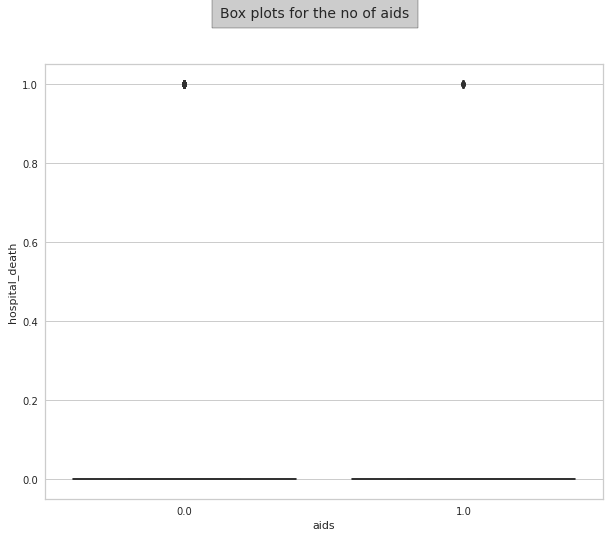

In [29]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(data=df, y='hospital_death', x='aids')
fig.suptitle('Box plots for the no of aids', bbox={'facecolor': '0.8', 'pad': 8}, fontsize=14)
plt.show()

<a name = Section55></a>
### **5.5 Handling of Outliers**


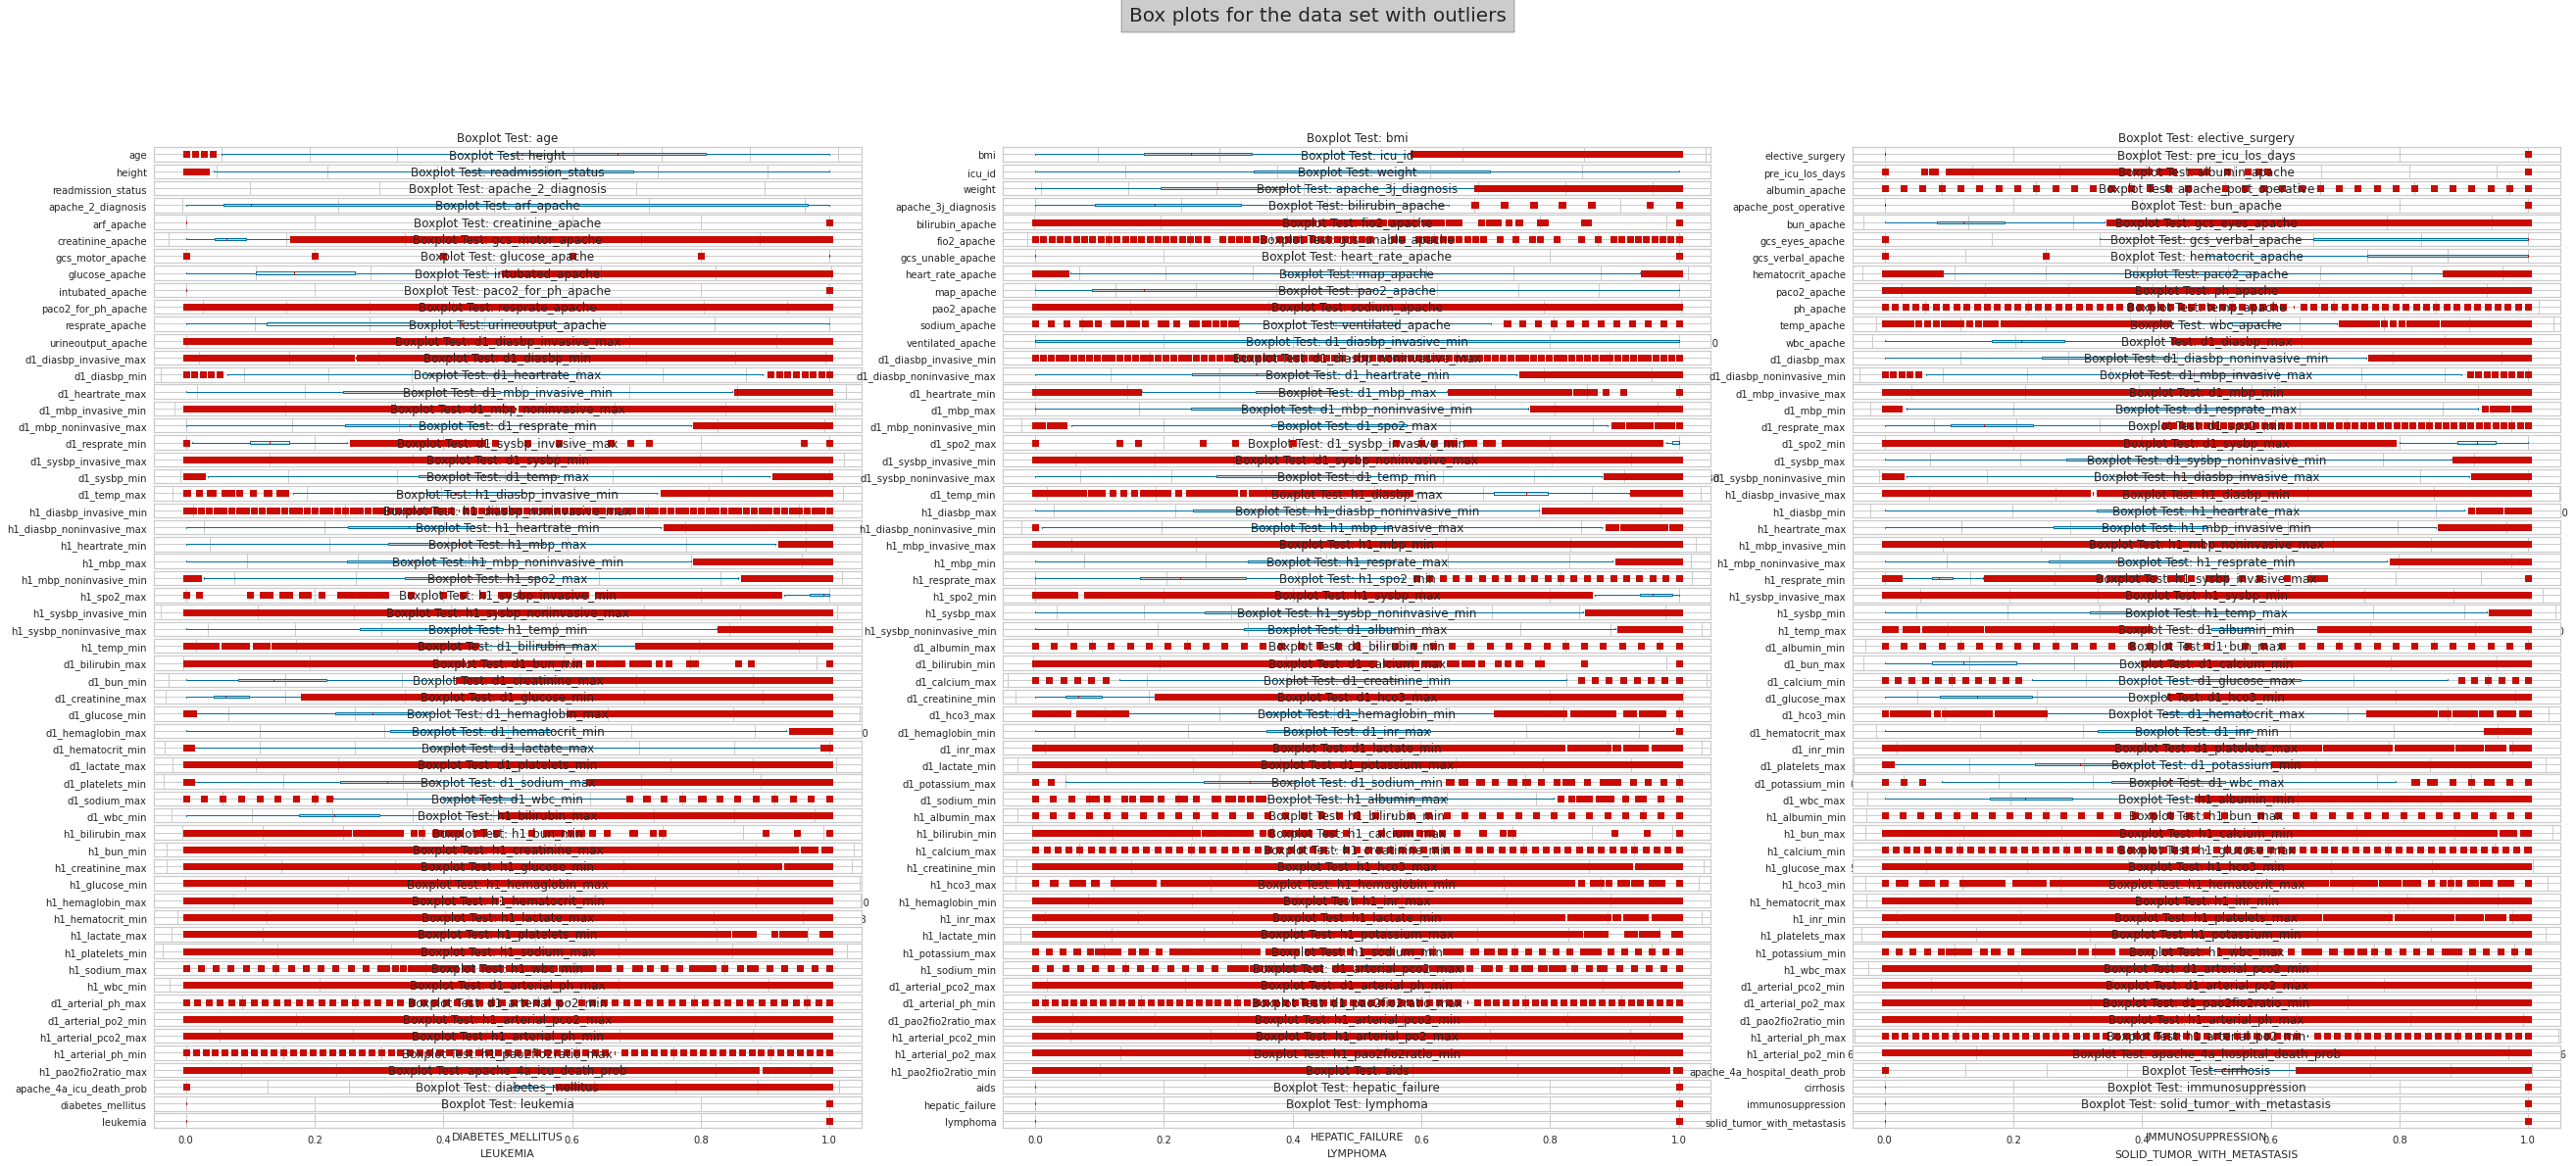

In [30]:
# for data
outcol = ['age', 'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'readmission_status', 'weight',
          'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 
          'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
          'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache',
          'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache',
          'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max',
          'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
          'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min',
          'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min',
          'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max',
          'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 
          'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 
          'h1_heartrate_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max',
          'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_invasive_max',
          'h1_sysbp_invasive_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 
          'h1_temp_max', 'h1_temp_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max',
          'd1_bun_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max',
          'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max', 
          'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min',
          'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_albumin_max',
          'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min',
          'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 
          'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min',
          'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min', 
          'h1_sodium_max', 'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min',
          'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 
          'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min',
          'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min',
          'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids', 'cirrhosis',
          'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
fig = plt.figure(figsize=(44, 20))
fig.suptitle('Box plots for the data set with outliers',bbox={'facecolor': '0.8', 'pad': 8}, fontsize=20)
for predictor in outcol:
    ctrain_o = outcol.index(predictor)
    # print(cntss)
    subsc = fig.add_subplot(63,3, ctrain_o+1)
    subsc.set_xlabel(predictor.upper())
    # sns.boxplot(y=trainstay[predictor])
    df[predictor].plot.box(grid=True, layout=(4, 2), vert=False, sym='rs')
    subsc.title.set_text('Boxplot Test: ' + str(predictor))

In [31]:
for c in outcol:
    print(c)    
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)   
    IQR = Q3-Q1
    upper = Q3+1.5*IQR    
    lower = Q1-1.5*IQR
    print('Percentiles: 25th(Q1)=%.3f, 75th(Q3)=%.3f, IQR=%.3f' % (Q1, Q1, IQR))
    # Identify outliers
    outliers = [x for x in df[c] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    #print(trainstay[c])         
    df[c][df[c]>=upper]=upper
    df[c][df[c]<=lower]=lower

age
Percentiles: 25th(Q1)=53.000, 75th(Q3)=53.000, IQR=22.000
Identified outliers: 772
bmi
Percentiles: 25th(Q1)=23.790, 75th(Q3)=23.790, IQR=8.860
Identified outliers: 3668
elective_surgery
Percentiles: 25th(Q1)=0.000, 75th(Q3)=0.000, IQR=0.000
Identified outliers: 16851
height
Percentiles: 25th(Q1)=162.560, 75th(Q3)=162.560, IQR=15.240
Identified outliers: 463
icu_id
Percentiles: 25th(Q1)=369.000, 75th(Q3)=369.000, IQR=310.000
Identified outliers: 0
pre_icu_los_days
Percentiles: 25th(Q1)=0.040, 75th(Q3)=0.040, IQR=0.370
Identified outliers: 15860
readmission_status
Percentiles: 25th(Q1)=0.000, 75th(Q3)=0.000, IQR=0.000
Identified outliers: 0
weight
Percentiles: 25th(Q1)=67.300, 75th(Q3)=67.300, IQR=29.000
Identified outliers: 2843
albumin_apache
Percentiles: 25th(Q1)=2.900, 75th(Q3)=2.900, IQR=0.000
Identified outliers: 35246
apache_2_diagnosis
Percentiles: 25th(Q1)=113.000, 75th(Q3)=113.000, IQR=188.000
Identified outliers: 0
apache_3j_diagnosis
Percentiles: 25th(Q1)=203.010, 75th(Q

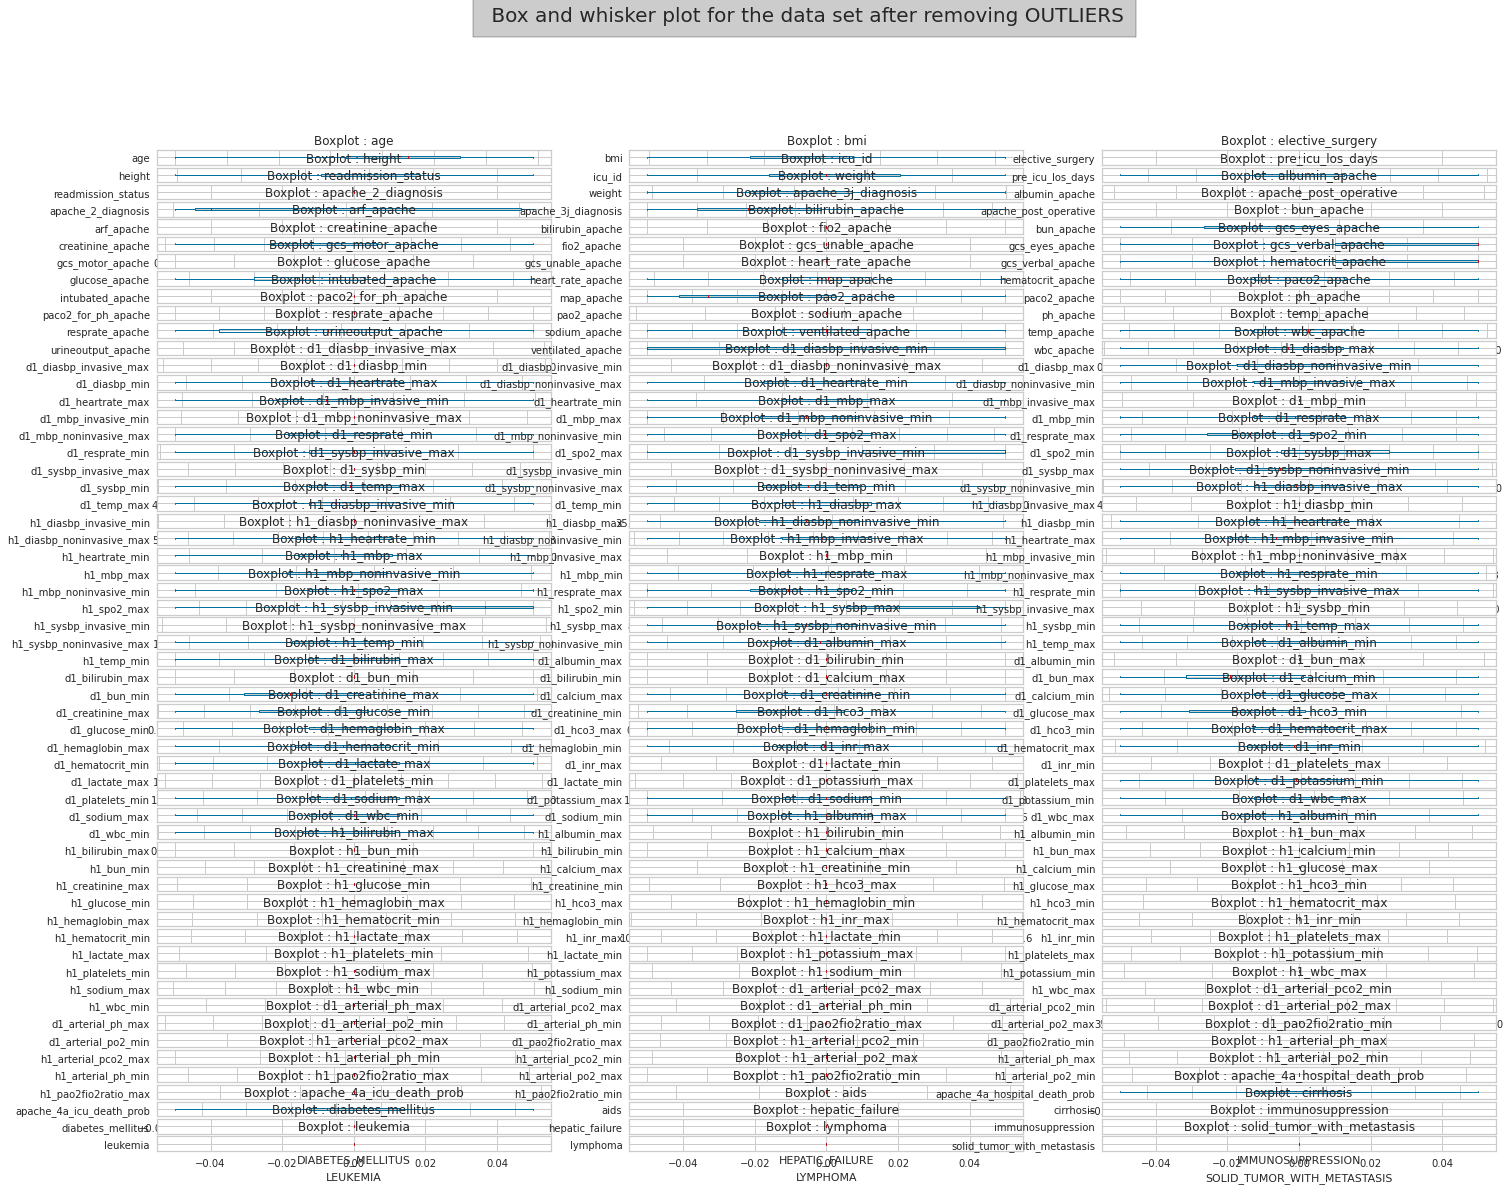

In [32]:
# for data
fig = plt.figure(figsize=(24, 20))
fig.suptitle(' Box and whisker plot for the data set after removing OUTLIERS', bbox={'facecolor':'0.8', 'pad':12}, fontsize = 20)
# Plotting scatter chart for each predictor vs the target variable
for predictor in outcol:
    ctrain = outcol.index(predictor)    
    #print(cntss)    
    subsc = fig.add_subplot(63, 3, ctrain+1)    
    subsc.set_xlabel(predictor.upper()) 
    df[predictor].plot.box(grid=True, layout=(4, 2), vert = False, sym='rs')
    #plt.show(block=True)
    subsc.title.set_text('Boxplot : '+ str(predictor))  

<AxesSubplot:>

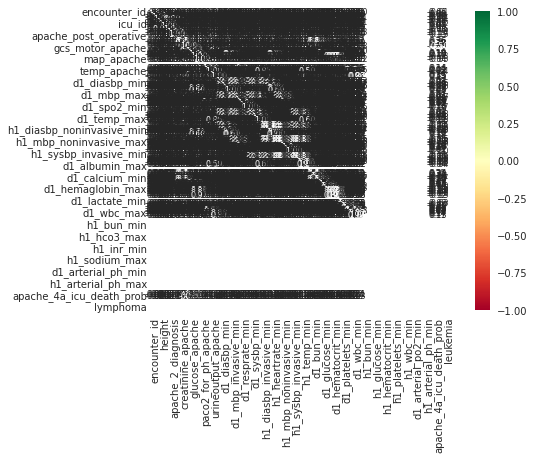

In [33]:
corr = df.drop('hospital_death', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn',
            vmax=1.0, vmin=-1.0, center=0, linewidth=0.1, annot_kws={'size': 8}, square=True, fmt='.2f',)

../input/psdataset<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

In [38]:
print(df.shape)
#df.to_csv("../input/psdataset/dfinal.csv")
#dfinal.read_csv("dfinal.csv", index_col=0)
dfinal=df.copy()
print(dfinal.shape)

(91713, 186)
(91713, 186)


In [39]:
dfinal['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [40]:
dfinal.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [41]:
dfinal.describe().T

count          mean           std       min  \
encounter_id                   91713.0  65606.079280  3.779509e+04     1.000   
patient_id                     91713.0  65537.131464  3.781125e+04     1.000   
hospital_id                    91713.0    105.669262  6.285441e+01     2.000   
hospital_death                 91713.0      0.086302  2.808108e-01     0.000   
age                            91713.0     62.448977  1.635253e+01    20.000   
bmi                            91713.0     28.794280  7.060087e+00    14.840   
elective_surgery               91713.0      0.000000  0.000000e+00     0.000   
height                         91713.0    169.660762  1.068025e+01   139.700   
icu_id                         91713.0    508.357692  2.289897e+02    82.000   
pre_icu_los_days               91713.0      0.294511  3.509604e-01    -0.515   
readmission_status             91713.0      0.000000  0.000000e+00     0.000   
weight                         91713.0     83.264705  2.264156e+01    38.600   
albumin_apache                 91713.0      2.900000  3.714382e-12     2.900   
apache_2_diagnosis             91713.0    184.252789  8.568601e+01   101.000   
apache_3j_diagnosis            91713.0    546.525908  4.370125e+02     0.010   
apache_post_operative          91713.0      0.000000  0.000000e+00     0.000   
arf_apache                     91713.0      0.000000  0.000000e+00     0.000   
bilirubin_apache               91713.0      0.600000  9.454711e-13     0.600   
bun_apache                     91713.0     22.035145  1.161095e+01     4.000   
creatinine_apache              91713.0      1.118365  4.916711e-01     0.300   
fio2_apache                    91713.0      0.500000  0.000000e+00     0.500   
gcs_eyes_apache                91713.0      3.521246  8.306169e-01     1.500   
gcs_motor_apache               91713.0      6.000000  0.000000e+00     6.000   
gcs_unable_apache              91713.0      0.000000  0.000000e+00     0.000   
gcs_verbal_apache              91713.0      4.299996  1.022382e+00     2.500   
glucose_apache                 91713.0    151.616711  6.831143e+01    39.000   
heart_rate_apache              91713.0     99.762585  3.043423e+01    37.500   
hematocrit_apache              91713.0     33.020156  5.914794e+00    19.250   
intubated_apache               91713.0      0.000000  0.000000e+00     0.000   
map_apache                     91713.0     87.788100  4.186061e+01    40.000   
paco2_apache                   91713.0     40.000000  0.000000e+00    40.000   
paco2_for_ph_apache            91713.0     40.000000  0.000000e+00    40.000   
pao2_apache                    91713.0    103.500000  0.000000e+00   103.500   
ph_apache                      91713.0      7.360000  1.115381e-11     7.360   
resprate_apache                91713.0     25.840460  1.500646e+01     4.000   
sodium_apache                  91713.0    138.024821  3.677772e+00   130.000   
temp_apache                    91713.0     36.443092  4.712369e-01    35.450   
urineoutput_apache             91713.0   1386.200000  2.054787e-09  1386.200   
ventilated_apache              91713.0      0.323182  4.676941e-01     0.000   
wbc_apache                     91713.0     11.226047  4.560403e+00     0.900   
d1_diasbp_invasive_max         91713.0     75.000000  0.000000e+00    75.000   
d1_diasbp_invasive_min         91713.0     46.000000  0.000000e+00    46.000   
d1_diasbp_max                  91713.0     88.122022  1.869133e+01    46.000   
d1_diasbp_min                  91713.0     50.136098  1.302223e+01    18.000   
d1_diasbp_noninvasive_max      91713.0     88.228485  1.859354e+01    46.000   
d1_diasbp_noninvasive_min      91713.0     50.214582  1.298226e+01    18.000   
d1_heartrate_max               91713.0    102.839401  2.153832e+01    58.000   
d1_heartrate_min               91713.0     70.462552  1.611099e+01    28.500   
d1_mbp_invasive_max            91713.0    101.000000  0.000000e+00   101.000   
d1_mbp_invasive_min            91

In [42]:
# Get list of categorical variables,date  and numerical variables for the data set
fcatcol=[col for col in dfinal.columns if dfinal[col].dtype == "object"]
print("Categorical cols of dataset = ", catcol, ". No of categorical features = ", len(catcol))
print("*****************************************************************\n")
fdatecol=[col for col in dfinal.columns if dfinal[col].dtype == "datetime64[ns]"]
print("DateTime cols of dataset = ", datecol, ". No of datetime features = ", len(datecol))
print("*****************************************************************\n")
fnumcol = [col for col in dfinal.columns if (dfinal[col].dtype != "object") & (dfinal[col].dtype != "datetime64[ns]")]
print("Numerical cols of dataset = ", numcol, ". No of numerical features = ", len(numcol))

Categorical cols of dataset =  ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem'] . No of categorical features =  8
*****************************************************************

DateTime cols of dataset =  [] . No of datetime features =  0
*****************************************************************

Numerical cols of dataset =  ['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apa

In [44]:
dfinal.hist(figsize=(40,40), grid=True, layout=(63,3), bins = 10)
plt.suptitle("Histogram Plot" + str(fnumcol), bbox={'facecolor':'0.8','pad':5},fontsize = 14);

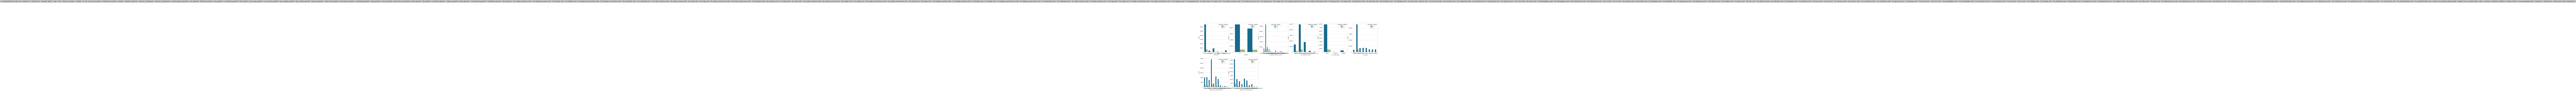

In [45]:
plt.figure(figsize=(30,30))
for i,feature in enumerate(fcatcol):
    plt.subplot(5,6,i+1)
    sns.countplot(dfinal[feature],hue=dfinal['hospital_death']);
    
plt.suptitle("countplotplot" + str(fnumcol), bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

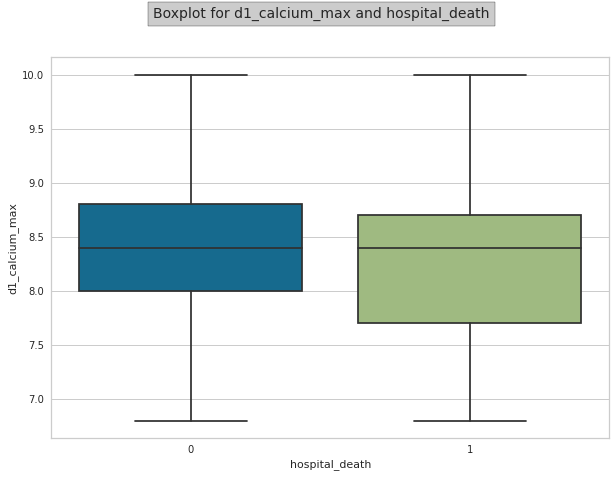

In [46]:
plt.figure(figsize=(10,7))
sns.boxplot(data=dfinal, y='d1_calcium_max', x='hospital_death');
plt.suptitle("Boxplot for d1_calcium_max and hospital_death", bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

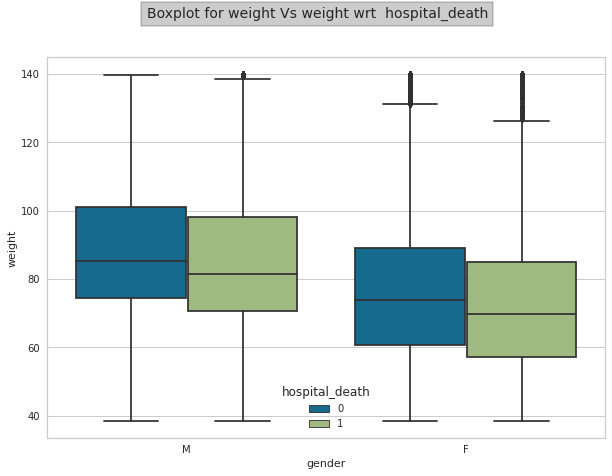

In [47]:
plt.figure(figsize=(10,7))
sns.boxplot(data=dfinal, y='weight', x='gender', hue = 'hospital_death');
plt.suptitle("Boxplot for weight Vs weight wrt  hospital_death", bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

In [48]:
pd.crosstab(index=dfinal['urineoutput_apache'], columns=dfinal['hospital_death'])

hospital_death          0     1
urineoutput_apache             
1386.2              83798  7915

<Figure size 720x504 with 0 Axes>

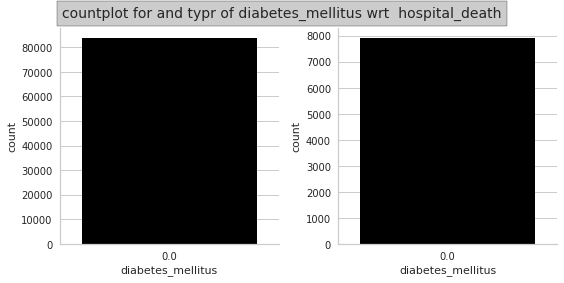

In [49]:
# creating a facet grid with columns 
plt.figure(figsize=(10,7))
grid = sns.FacetGrid(data=dfinal, col='hospital_death', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'diabetes_mellitus', palette=['black', 'brown', 'orange'])
plt.suptitle("countplot for and typr of diabetes_mellitus wrt  hospital_death", bbox={'facecolor':'0.8','pad':5},fontsize = 14)
plt.show()

<a name = Section7></a>

---
# **7. Data Post-Processing**

<a name = Section71></a>
### **7.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and manipulate any column as necessary

In [50]:
dfinal.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [51]:
dfinal.shape

(91713, 186)

In [52]:
df.head()

encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  20.0  27.65   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 0  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0  Emergency Department   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0              0.54                   0    73.9             2.9   
1              0.93                   0    70.2             2.9   
2              0.00                   0    95.3             2.9   
3              0.00                   0    61.7             2.9   
4              0.07                   0    80.3             2.9   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      0         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.6        31.0              2.115          0.5   
1               0.6         9.0              0.560          0.5   
2               0.6        19.0              0.980          0.5   
3               0.6        19.0              0.980          0.5   
4               0.6        19.0              0.980          0.5   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.5               6.0                0.0                2.5   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              4.0               6.0                0.0                5.0   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2           133.0              102.0               33.2               0.0   
3           185.0              114.0               25.9               0.0   
4           133.0               60.0               33.2               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0          40.0                 40.0        103.5       7.36   
1        46.0          40.0                 40.0        103.5       7.36   
2        68.0          40.0                 40.0        103.5       7.36   
3        60.0          40.0                 40.0        103.5       7.36   
4       103.0          40.0                 40.0        103.5       7.36   

   resprate_apache  sodium_apache  temp_apache

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for a in fcatcol:    
    dfinal[a]= le.fit_transform(dfinal[a])

In [74]:
# Summarize scores
np.set_printoptions(precision=3)

In [64]:
num_feats = 40

In [65]:
X = dfinal.drop(columns=['encounter_id','patient_id','hospital_id','hospital_death'], axis=1)
y = dfinal['hospital_death']
print(X.shape,y.shape)


(91713, 182) (91713,)


In [66]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

40 selected features


In [67]:
print( 'selected features',embeded_rf_feature)

selected features ['age', 'bmi', 'icu_id', 'weight', 'apache_3j_diagnosis', 'gcs_eyes_apache', 'glucose_apache', 'heart_rate_apache', 'map_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_min', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_min', 'd1_mbp_noninvasive_min', 'd1_resprate_min', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_sysbp_min', 'h1_sysbp_noninvasive_min', 'd1_bun_max', 'd1_bun_min', 'd1_creatinine_max', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max', 'd1_platelets_min', 'd1_wbc_max', 'd1_wbc_min', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob']


In [68]:
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances 
from sklearn.ensemble import RandomForestClassifier   

# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
#selector.fit(feature_select, y)
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()
#selected_feat = feature_select.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 84
Threshold set by Model: 0.01
Features: ['age', 'bmi', 'height', 'icu_id', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvas

Feature Score of apache_2_bodysystem : 0.0519768332295628
Feature Score of apache_3j_bodysystem : 0.03892848679077173
Feature Score of solid_tumor_with_metastasis : 0.01898727162133672
Feature Score of lymphoma : 0.01848727499254212
Feature Score of leukemia : 0.018297319778850542
Feature Score of immunosuppression : 0.01827603247386379
Feature Score of hepatic_failure : 0.01725116332561896
Feature Score of diabetes_mellitus : 0.015621433603407932
Feature Score of cirrhosis : 0.01499192976621472
Feature Score of aids : 0.014090365260188574
Feature Score of apache_4a_icu_death_prob : 0.013560250159721645
Feature Score of apache_4a_hospital_death_prob : 0.01333011448501589
Feature Score of h1_pao2fio2ratio_min : 0.013192717091544803
Feature Score of h1_pao2fio2ratio_max : 0.013141246601055636
Feature Score of h1_arterial_po2_min : 0.012999782812981864
Feature Score of h1_arterial_po2_max : 0.012792412144013074
Feature Score of h1_arterial_ph_min : 0.012507974606845952
Feature Score of h1

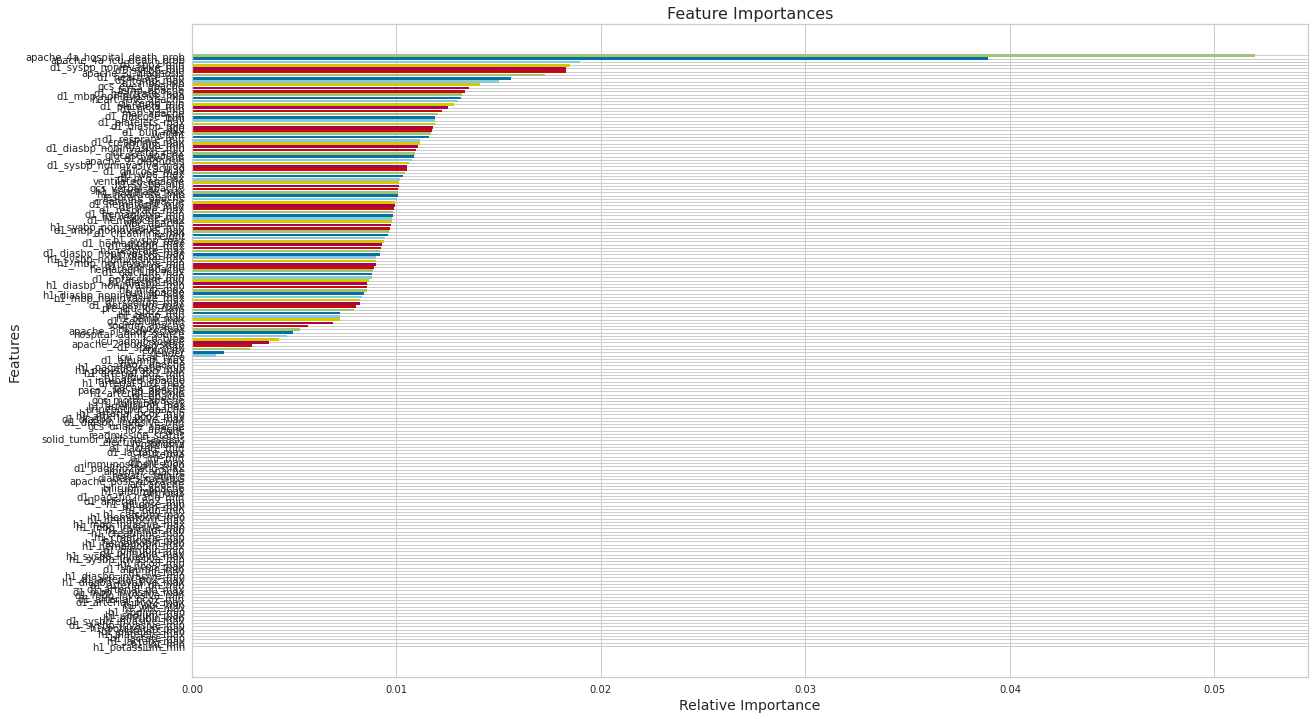

In [75]:
#Visualization of Important Features:
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)

#viz.fit(feature_select, y)
viz.fit(X, y)

importance = viz.feature_importances_ 
# summarize feature importance
# Creating a list of feature names
feature_names = X.columns

for score, name in sorted(zip(importance, feature_names), reverse=True):
    print('Feature Score of', name, ':', score)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()


Text(0.5, 1.0, 'Feature Importance of each Feature')

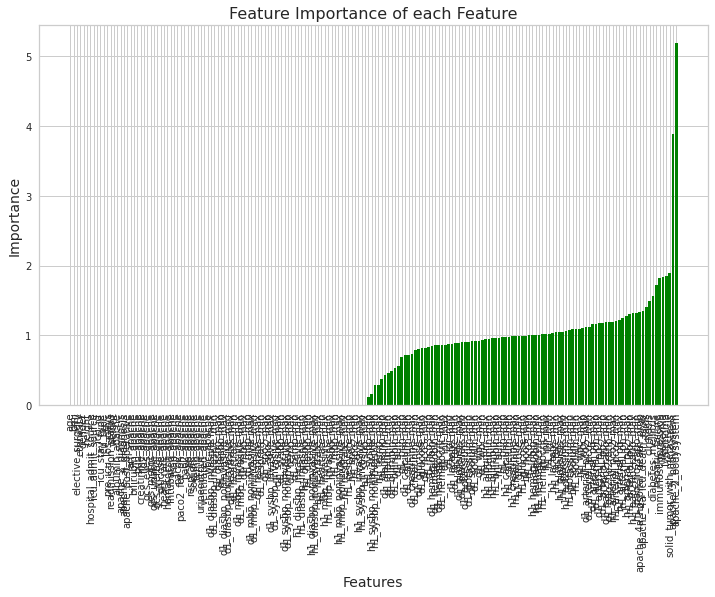

In [82]:
# Plotting the Feature Importance of each feature.
plt.figure(figsize=(12, 7))
plt.bar(feature_names, importance*100, color='green')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each Feature', fontsize=16)

In [71]:
viz.features_.argsort()

array([159,  66,  54,  93, 149,  97, 176, 181, 180,  51,  50,  49, 162,
       109,  47, 137,  88,  24,  14,  15,  18,  19,  21,  45,  29,  30,
       158, 154, 115, 117, 155, 127,  70,  69, 123, 160, 121, 153, 146,
       163, 144, 165, 170, 175, 124, 133, 131, 136,  57,  58,  60,  61,
        17,  16, 135, 173, 128, 169,  55,  46, 161, 166, 105, 113, 134,
       156, 106, 100,  92, 179,   8,   7, 152, 177, 148, 178, 174, 167,
       145, 150,  52,  63,  91,  67, 172,  76,  68, 141,  90, 151,  48,
        83,  71,  72,  74,  78,  81,  84,  75,   9,  43,  42,  41,  36,
        35,  34,  20,  22, 112, 120, 108, 111,  33,  44,  25,  26, 140,
       139,  31,  32,  39,  40,  23,   1,   2,   3,  38,  37, 110, 114,
       107, 118,  85,  86,   4,   5,   6,   0, 122, 132,  10,  11,  98,
       103,  28,  27, 125, 142, 119, 129, 101, 102,  12,  13, 168, 126,
       116,  53,  96,  94, 147,  89,  95,  56,  82,  59,  62, 164,  80,
        79,  87,  77, 104,  65, 138,  99,  64, 171,  73, 143, 13

In [88]:
# Extract impactful columns (large coefs)
#lr_coefs = [(col, coef, pos) for pos, (col, coef) in enumerate(zip(X_train.columns[1:], lr.coef_[0]))]
#top_ = sorted(lr_coefs, key = lambda x: -abs(x[1]))[:25]
#top_columns = [name for name, coef, pos in top_]
#top_column_pos = [pos for name, coef, pos in top_]

#print(top_columns, "\n")
#print(top_column_pos)

SyntaxError: invalid syntax (1912283170.py, line 1)

In [86]:
X=X.drop(columns=['weight','wbc_apache','ventilated_apache','urineoutput_apache','temp_apache','sodium_apache','resprate_apache','readmission_status',
'pre_icu_los_days', 'ph_apache','pao2_apache','paco2_for_ph_apache','paco2_apache','map_apache','intubated_apache','icu_type','icu_stay_type',              
'icu_id','icu_admit_source','hospital_admit_source','hematocrit_apache','height','heart_rate_apache','h1_sysbp_max','h1_sysbp_invasive_min',                 
'h1_sysbp_invasive_max','h1_spo2_min','h1_spo2_max','h1_resprate_min','h1_resprate_max','h1_mbp_noninvasive_min','h1_mbp_noninvasive_max', 
'h1_mbp_min','h1_mbp_max','h1_mbp_invasive_min','h1_mbp_invasive_max','h1_heartrate_min','h1_heartrate_max','d1_diasbp_noninvasive_min', 
'h1_diasbp_noninvasive_max','h1_diasbp_min','h1_diasbp_max','h1_diasbp_invasive_min','h1_diasbp_invasive_max','glucose_apache','gender',
'gcs_verbal_apache','gcs_unable_apache','gcs_motor_apache','gcs_eyes_apache','fio2_apache','ethnicity','elective_surgery','d1_temp_min',
'd1_temp_max','d1_sysbp_noninvasive_min','d1_sysbp_noninvasive_max','d1_sysbp_min','d1_sysbp_max','d1_sysbp_invasive_min',
'd1_sysbp_invasive_max','d1_spo2_min','d1_spo2_max','d1_resprate_min','d1_resprate_max','d1_mbp_noninvasive_min','d1_mbp_noninvasive_max',
'd1_mbp_min','d1_mbp_max','d1_mbp_invasive_min','d1_mbp_invasive_max','d1_heartrate_min','d1_heartrate_max','d1_diasbp_noninvasive_min',
'd1_diasbp_noninvasive_max','d1_diasbp_min','d1_diasbp_max','d1_diasbp_invasive_min','d1_diasbp_invasive_max','creatinine_apache',
'bun_apache','bmi','bilirubin_apache','arf_apache','apache_post_operative','apache_3j_diagnosis','apache_2_diagnosis','albumin_apache','age'],axis=1)

In [87]:
X.columns

Index(['h1_diasbp_noninvasive_min', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max',
       'h1_sysbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max',
       'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max',
       'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min',
       'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max',
       'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max',
       'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max',
       'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max',


<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [90]:
y = dfinal['hospital_death']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: hospital_death, dtype: int64

In [91]:
print(X.shape)
print(y.shape)

(91713, 94)
(91713,)


In [92]:
# Splitting data into training and testing sets with Test Data as 35%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (59613, 94)
y_train shape:  (59613,)
X_test shape:  (32100, 94)
y_test shape:  (32100,)


In [ ]:
X_train.head()

In [ ]:
y.head()

In [ ]:
X_train_sample = X_train.sample(100)
X_test_sample.head()

In [ ]:
X_test_sample = X_test.sample(100)
X_test_sample.head()

<a name = Section73></a>
### **7.3 Data Scaling**

- Now, evaluating model with help of scaling the data.

In [95]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [96]:
X_test = sc.transform(X_test)

In [98]:
#X_sample = X_train.sample(100)
X_sample.head()

h1_diasbp_noninvasive_min  h1_sysbp_min  h1_sysbp_noninvasive_max  \
59189                       77.0         128.0                     128.0   
68114                       69.0         140.0                     140.0   
25821                       65.0         129.0                     155.0   
19311                       59.0         139.0                     174.0   
72010                       62.0         115.0                     130.0   

       h1_sysbp_noninvasive_min  h1_temp_max  h1_temp_min  d1_albumin_max  \
59189                     128.0         36.9         36.9             3.0   
68114                     140.0         36.7         36.6             3.0   
25821                     129.0         37.4         37.4             3.0   
19311                     139.0         36.6         36.6             3.0   
72010                     115.0         36.7         36.6             3.0   

       d1_albumin_min  d1_bilirubin_max  d1_bilirubin_min  d1_bun_max  \
59189             2.9               0.6               0.6        13.0   
68114             2.9               0.6               0.6         6.0   
25821             2.9               0.6               0.6        12.0   
19311             2.9               0.6               0.6        17.0   
72010             2.9               0.6               0.6        11.0   

       d1_bun_min  d1_calcium_max  d1_calcium_min  d1_creatinine_max  \
59189        13.0             8.6             8.6               0.77   
68114         6.0             8.2             8.2               0.97   
25821        12.0             8.6             8.6               0.67   
19311        17.0             7.9             7.9               1.07   
72010        11.0             8.8             8.8               0.81   

       d1_creatinine_min  d1_glucose_max  d1_glucose_min  d1_hco3_max  \
59189               0.77            83.0            83.0         28.0   
68114               0.97            89.0            89.0         25.0   
25821               0.67           185.0           135.0         22.0   
19311               1.07           118.0            79.0         25.0   
72010               0.81           201.0           132.0         24.0   

       d1_hco3_min  d1_hemaglobin_max  d1_hemaglobin_min  d1_hematocrit_max  \
59189         28.0               12.5               12.5               36.6   
68114         25.0               14.7               14.7               45.5   
25821         22.0               11.0               11.0               34.6   
19311         25.0                9.9                9.9               31.5   
72010         23.0               13.6               12.9               42.6   

       d1_hematocrit_min  d1_inr_max  d1_inr_min  d1_lactate_max  \
59189               36.6         1.3        1.21             1.9   
68114               45.5         1.3        1.21             1.9   
25821               34.6         1.3        1.21             1.9   
19311               31.5         1.3        1.21             1.9   
72010               38.0         1.3        1.21             1.9   

       d1_lactate_min  d1_platelets_max  d1_platelets_min  d1_potassium_max  \
59189             1.5             175.0             175.0               4.1   
68114             1.5             232.0             232.0               3.3   
25821             1.5             244.0             244.0               4.1   
19311             1.5             221.0             221.0               3.7   
72010             1.5             310.0             310.0               3.4   

       d1_potassium_min  d1_sodium_max  d1_sodium_min  d1_wbc_max  d1_wbc_min  \
59189               4.1          141.0          141.0        10.6        10.6   
68114               3.3          136.0          136.0         8.5         8.5   
25821               4.1          135.0          135.0        17.2        17.2   
19311               3.7          144.0          144.0         6.9         6.9   
72010       

In [99]:
#X_test_sample = X_test.sample(100)
X_test_sample.head()

h1_diasbp_noninvasive_min  h1_sysbp_min  h1_sysbp_noninvasive_max  \
26231                       58.0         116.0                     157.0   
14468                       67.0         108.0                     118.0   
45225                       42.0          82.0                     110.0   
75994                       81.0         140.0                     140.0   
44491                       63.0         125.0                     157.0   

       h1_sysbp_noninvasive_min  h1_temp_max  h1_temp_min  d1_albumin_max  \
26231                     116.0         36.7         36.6             3.0   
14468                     108.0         36.7         36.7             3.0   
45225                      82.0         37.3         37.3             3.0   
75994                     140.0         36.2         36.2             3.0   
44491                     125.0         37.0         37.0             3.0   

       d1_albumin_min  d1_bilirubin_max  d1_bilirubin_min  d1_bun_max  \
26231             2.9               0.6               0.6        12.0   
14468             2.9               0.6               0.6         4.0   
45225             2.9               0.6               0.6        53.0   
75994             2.9               0.6               0.6        10.0   
44491             2.9               0.6               0.6        27.0   

       d1_bun_min  d1_calcium_max  d1_calcium_min  d1_creatinine_max  \
26231        11.0             8.6             8.1               0.83   
14468         3.0             7.9             7.9               0.54   
45225        49.5             8.0             7.6               1.30   
75994        10.0             8.7             8.7               0.67   
44491        19.0             9.1             8.8               1.10   

       d1_creatinine_min  d1_glucose_max  d1_glucose_min  d1_hco3_max  \
26231               0.82           170.0            97.0         26.0   
14468               0.54            91.0            91.0         25.0   
45225               1.00           212.0           103.0         25.0   
75994               0.67           204.0            60.0         24.0   
44491               0.80           164.0            98.0         28.0   

       d1_hco3_min  d1_hemaglobin_max  d1_hemaglobin_min  d1_hematocrit_max  \
26231         18.0               15.4               12.4               45.2   
14468         25.0               11.4               10.9               34.5   
45225         23.0               11.2               11.2               38.3   
75994         23.0               12.3               12.3               37.3   
44491         24.0                9.2                9.1               28.8   

       d1_hematocrit_min  d1_inr_max  d1_inr_min  d1_lactate_max  \
26231               35.9         1.3        1.21             1.9   
14468               33.2         1.3        1.21             1.9   
45225               38.3         1.3        1.21             1.9   
75994               37.3         1.3        1.21             1.9   
44491               28.8         1.3        1.21             1.9   

       d1_lactate_min  d1_platelets_max  d1_platelets_min  d1_potassium_max  \
26231             1.5             164.0             109.0               4.3   
14468             1.5             196.0             187.0               3.3   
45225             1.5             158.0             158.0               4.4   
75994             1.5             287.0             287.0               4.2   
44491             1.5             178.0             169.0               4.6   

       d1_potassium_min  d1_sodium_max  d1_sodium_min  d1_wbc_max  d1_wbc_min  \
26231               3.6          141.0          138.0       13.80        8.40   
14468               3.3          137.0          137.0       11.00       10.10   
45225               4.2          147.0          146.0       13.46       13.46   
75994               4.2          138.0          138.0       10.50       10.50   
44491       

<a name = Section8></a>

---
# **8. Model Development & Evaluation using Deep Learning**
---

- Here we will develop deep learning model.

In [100]:
#Dependencies
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import sklearn as sk

In [104]:
# Neural network
model = Sequential()
model.add(Dense(48, input_dim=94, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [105]:
# Print initial weights
weights = model.layers[0].get_weights()
w_init = weights[0]
b_init = weights[1]
print("Logistic regression model is initialized with weights - {} and biases - {}".format(w_init, b_init))

Logistic regression model is initialized with weights - [[-0.142  0.065  0.172 ...  0.121 -0.154 -0.049]
 [ 0.002  0.117 -0.141 ...  0.156 -0.173 -0.173]
 [ 0.018  0.027 -0.045 ...  0.159  0.072  0.124]
 ...
 [-0.19   0.187  0.078 ...  0.124  0.087 -0.104]
 [ 0.143  0.008  0.201 ...  0.07   0.202 -0.142]
 [-0.156 -0.139  0.127 ... -0.007  0.113 -0.023]] and biases - [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [106]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 48)                4560      
_________________________________________________________________
dense_3 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 6,049
Trainable params: 6,049
Non-trainable params: 0
_________________________________________________________________


Training step is simple in keras. model.fit is used to train it.

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=200, verbose=1)
# Epochs are the number of iterations for training. Verbose can be switched to 0 if you don't want to print 
# the step-wise training loss. Try it.

2022-04-05 06:04:18.896039: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
299/299 [==============================] - 2s 3ms/step - loss: 0.2600 - accuracy: 0.9126
Epoch 2/50
299/299 [==============================] - 1s 3ms/step - loss: 0.2289 - accuracy: 0.9166
Epoch 3/50
299/299 [==============================] - 1s 3ms/step - loss: 0.2229 - accuracy: 0.9179
Epoch 4/50
299/299 [==============================] - 1s 3ms/step - loss: 0.2191 - accuracy: 0.9188
Epoch 5/50
299/299 [==============================] - 1s 3ms/step - loss: 0.2159 - accuracy: 0.9188
Epoch 6/50
299/299 [==============================] - 1s 3ms/step - loss: 0.2139 - accuracy: 0.9201
Epoch 7/50
299/299 [==============================] - 1s 4ms/step - loss: 0.2128 - accuracy: 0.9191
Epoch 8/50
299/299 [==============================] - 1s 3ms/step - loss: 0.2108 - accuracy: 0.9203
Epoch 9/50
299/299 [==============================] - 1s 3ms/step - loss: 0.2094 - accuracy: 0.9208
Epoch 10/50
299/299 [==============================] - 1s 3ms/step - loss: 0.2085 - accuracy: 0.9210

In [108]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  accuracy  epoch
45  0.187856  0.928690     45
46  0.187052  0.928774     46
47  0.186861  0.929680     47
48  0.186502  0.928891     48
49  0.186812  0.928975     49

In [109]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f' % (accuracy*100))

1863/1863 [==============================] - 4s 2ms/step - loss: 0.1860 - accuracy: 0.9303
Training Accuracy: 93.03


In [114]:
test_predictions = model.predict(X_test).flatten()

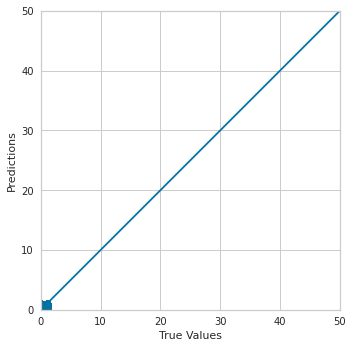

In [116]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

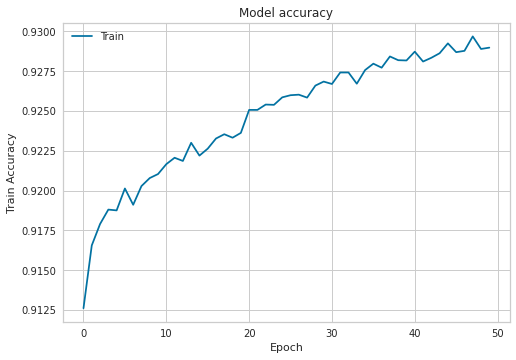

In [110]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Train Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

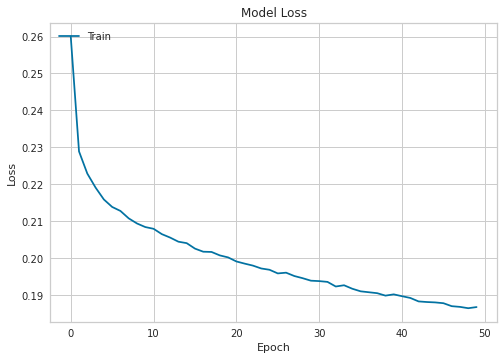

In [111]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [112]:
print('\nTesting ------------')
cost = model.evaluate(X_test, y_test, batch_size=400)
print('test cost:', cost)
weights = model.layers[0].get_weights()
W = weights[0]
b = weights[1]
print('Weights=', W, '\nbiases=', b)


Testing ------------
81/81 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.9099
test cost: [0.2356383204460144, 0.9099376797676086]
Weights= [[-0.202  0.127  0.248 ...  0.317 -0.222 -0.022]
 [ 0.007  0.145 -0.233 ...  0.31  -0.146 -0.136]
 [-0.127 -0.147 -0.202 ... -0.016 -0.013 -0.187]
 ...
 [-0.19   0.187  0.078 ...  0.124  0.087 -0.104]
 [ 0.039  0.044  0.013 ... -0.09   0.175 -0.107]
 [-0.181 -0.096 -0.114 ... -0.088  0.072 -0.091]] 
biases= [-0.121 -0.165  0.163  0.157 -0.379  0.281 -0.296  0.168  0.162  0.131
  0.315  0.23  -0.095  0.191  0.093  0.053 -0.009  0.245  0.09   0.213
 -0.107 -0.295 -0.073  0.024  0.38   0.208  0.047 -0.113 -0.048  0.106
  0.158 -0.067  0.443  0.121 -0.497  0.318  0.277 -0.027 -0.369 -0.231
 -0.212 -0.293 -0.006  0.175  0.325 -0.272  0.128  0.016]


1004/1004 [==============================] - 2s 2ms/step - loss: 0.2356 - accuracy: 0.9099


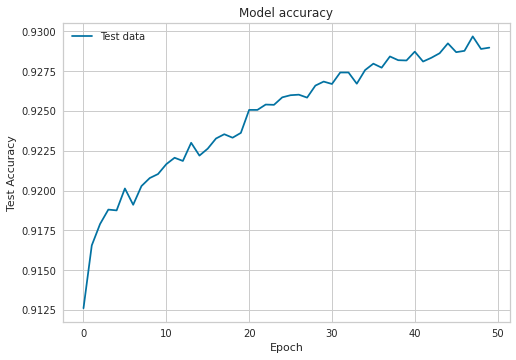

In [113]:
import matplotlib.pyplot as plt
_, accuracy = model.evaluate(X_test, y_test)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Test Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test data'], loc='upper left')
plt.show()

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k, v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

<a name = Section9></a>

---
# **9. Saving and loading the keras model**
---

- In this section we will **see how to save and load the model**

In [117]:
# saving the model
model.save('../model/keras_model.h5')

In [118]:
#loading the model 
from keras.models import load_model
model = load_model('../model/keras_model.h5')

<a name = Section10></a>

---
# **10. Explainable AI**
---

- In this section we will **use AI with the model**

In [120]:
#X_sample = X_train.sample(100)
X_sample.head()

h1_diasbp_noninvasive_min  h1_sysbp_min  h1_sysbp_noninvasive_max  \
59189                       77.0         128.0                     128.0   
68114                       69.0         140.0                     140.0   
25821                       65.0         129.0                     155.0   
19311                       59.0         139.0                     174.0   
72010                       62.0         115.0                     130.0   

       h1_sysbp_noninvasive_min  h1_temp_max  h1_temp_min  d1_albumin_max  \
59189                     128.0         36.9         36.9             3.0   
68114                     140.0         36.7         36.6             3.0   
25821                     129.0         37.4         37.4             3.0   
19311                     139.0         36.6         36.6             3.0   
72010                     115.0         36.7         36.6             3.0   

       d1_albumin_min  d1_bilirubin_max  d1_bilirubin_min  d1_bun_max  \
59189             2.9               0.6               0.6        13.0   
68114             2.9               0.6               0.6         6.0   
25821             2.9               0.6               0.6        12.0   
19311             2.9               0.6               0.6        17.0   
72010             2.9               0.6               0.6        11.0   

       d1_bun_min  d1_calcium_max  d1_calcium_min  d1_creatinine_max  \
59189        13.0             8.6             8.6               0.77   
68114         6.0             8.2             8.2               0.97   
25821        12.0             8.6             8.6               0.67   
19311        17.0             7.9             7.9               1.07   
72010        11.0             8.8             8.8               0.81   

       d1_creatinine_min  d1_glucose_max  d1_glucose_min  d1_hco3_max  \
59189               0.77            83.0            83.0         28.0   
68114               0.97            89.0            89.0         25.0   
25821               0.67           185.0           135.0         22.0   
19311               1.07           118.0            79.0         25.0   
72010               0.81           201.0           132.0         24.0   

       d1_hco3_min  d1_hemaglobin_max  d1_hemaglobin_min  d1_hematocrit_max  \
59189         28.0               12.5               12.5               36.6   
68114         25.0               14.7               14.7               45.5   
25821         22.0               11.0               11.0               34.6   
19311         25.0                9.9                9.9               31.5   
72010         23.0               13.6               12.9               42.6   

       d1_hematocrit_min  d1_inr_max  d1_inr_min  d1_lactate_max  \
59189               36.6         1.3        1.21             1.9   
68114               45.5         1.3        1.21             1.9   
25821               34.6         1.3        1.21             1.9   
19311               31.5         1.3        1.21             1.9   
72010               38.0         1.3        1.21             1.9   

       d1_lactate_min  d1_platelets_max  d1_platelets_min  d1_potassium_max  \
59189             1.5             175.0             175.0               4.1   
68114             1.5             232.0             232.0               3.3   
25821             1.5             244.0             244.0               4.1   
19311             1.5             221.0             221.0               3.7   
72010             1.5             310.0             310.0               3.4   

       d1_potassium_min  d1_sodium_max  d1_sodium_min  d1_wbc_max  d1_wbc_min  \
59189               4.1          141.0          141.0        10.6        10.6   
68114               3.3          136.0          136.0         8.5         8.5   
25821               4.1          135.0          135.0        17.2        17.2   
19311               3.7          144.0          144.0         6.9         6.9   
72010       

In [121]:
#X_test_sample  = X_test.sample(100)
X_test_sample.head()

h1_diasbp_noninvasive_min  h1_sysbp_min  h1_sysbp_noninvasive_max  \
26231                       58.0         116.0                     157.0   
14468                       67.0         108.0                     118.0   
45225                       42.0          82.0                     110.0   
75994                       81.0         140.0                     140.0   
44491                       63.0         125.0                     157.0   

       h1_sysbp_noninvasive_min  h1_temp_max  h1_temp_min  d1_albumin_max  \
26231                     116.0         36.7         36.6             3.0   
14468                     108.0         36.7         36.7             3.0   
45225                      82.0         37.3         37.3             3.0   
75994                     140.0         36.2         36.2             3.0   
44491                     125.0         37.0         37.0             3.0   

       d1_albumin_min  d1_bilirubin_max  d1_bilirubin_min  d1_bun_max  \
26231             2.9               0.6               0.6        12.0   
14468             2.9               0.6               0.6         4.0   
45225             2.9               0.6               0.6        53.0   
75994             2.9               0.6               0.6        10.0   
44491             2.9               0.6               0.6        27.0   

       d1_bun_min  d1_calcium_max  d1_calcium_min  d1_creatinine_max  \
26231        11.0             8.6             8.1               0.83   
14468         3.0             7.9             7.9               0.54   
45225        49.5             8.0             7.6               1.30   
75994        10.0             8.7             8.7               0.67   
44491        19.0             9.1             8.8               1.10   

       d1_creatinine_min  d1_glucose_max  d1_glucose_min  d1_hco3_max  \
26231               0.82           170.0            97.0         26.0   
14468               0.54            91.0            91.0         25.0   
45225               1.00           212.0           103.0         25.0   
75994               0.67           204.0            60.0         24.0   
44491               0.80           164.0            98.0         28.0   

       d1_hco3_min  d1_hemaglobin_max  d1_hemaglobin_min  d1_hematocrit_max  \
26231         18.0               15.4               12.4               45.2   
14468         25.0               11.4               10.9               34.5   
45225         23.0               11.2               11.2               38.3   
75994         23.0               12.3               12.3               37.3   
44491         24.0                9.2                9.1               28.8   

       d1_hematocrit_min  d1_inr_max  d1_inr_min  d1_lactate_max  \
26231               35.9         1.3        1.21             1.9   
14468               33.2         1.3        1.21             1.9   
45225               38.3         1.3        1.21             1.9   
75994               37.3         1.3        1.21             1.9   
44491               28.8         1.3        1.21             1.9   

       d1_lactate_min  d1_platelets_max  d1_platelets_min  d1_potassium_max  \
26231             1.5             164.0             109.0               4.3   
14468             1.5             196.0             187.0               3.3   
45225             1.5             158.0             158.0               4.4   
75994             1.5             287.0             287.0               4.2   
44491             1.5             178.0             169.0               4.6   

       d1_potassium_min  d1_sodium_max  d1_sodium_min  d1_wbc_max  d1_wbc_min  \
26231               3.6          141.0          138.0       13.80        8.40   
14468               3.3          137.0          137.0       11.00       10.10   
45225               4.2          147.0          146.0       13.46       13.46   
75994               4.2          138.0          138.0       10.50       10.50   
44491       

In [126]:
import shap
shap.initjs()
explainer = shap.KernelExplainer(model,X_sample)
shap_values = explainer.shap_values(X_test_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

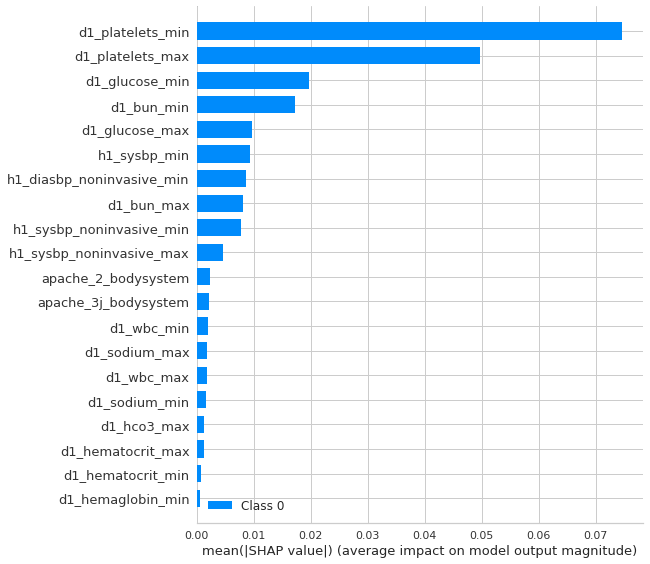

In [127]:
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")

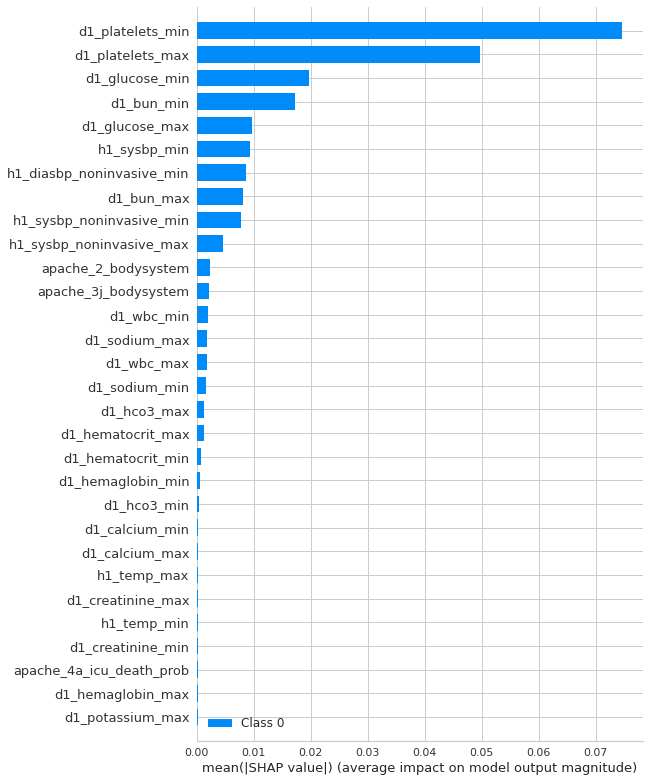

In [128]:
shap.summary_plot(shap_values, X_test_sample, max_display=30)

In [129]:
print(shap_values)

[array([[-0.002,  0.   ,  0.005, ...,  0.   , -0.002,  0.   ],
       [ 0.004, -0.002, -0.002, ...,  0.   ,  0.002, -0.004],
       [-0.007, -0.01 , -0.003, ...,  0.   ,  0.001,  0.001],
       ...,
       [ 0.004,  0.   , -0.002, ...,  0.   , -0.003,  0.   ],
       [ 0.006,  0.002,  0.   , ...,  0.   ,  0.001, -0.002],
       [-0.004, -0.005, -0.008, ...,  0.   , -0.002, -0.004]])]


In [130]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][:], X_test_sample)

In [145]:
test_predictions = model.predict(X_test)
print(test_predictions[50])

[0.003]


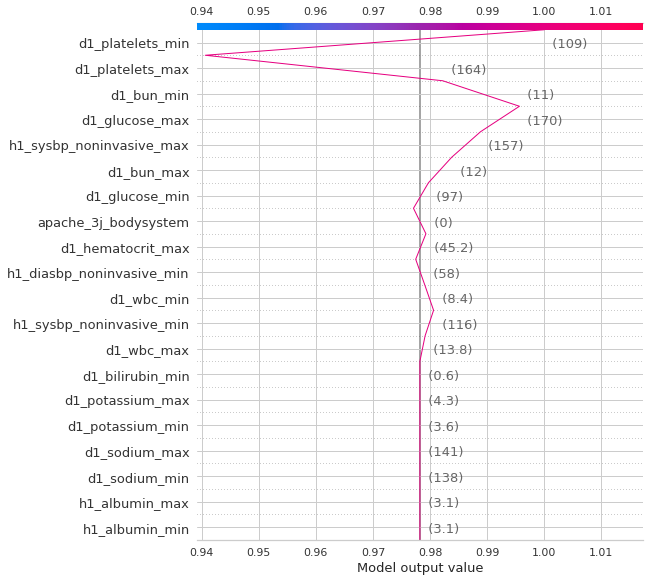

In [139]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][0], features = X_test_sample.iloc[0,:], feature_names = X_test_sample.columns.tolist())

In [140]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test_sample.iloc[0,:])

In [143]:
shap.initjs()
i=13
print(test_predictions[i])
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_test_sample.values[i], feature_names = X_test_sample.columns)

0.008319656


[0.189]


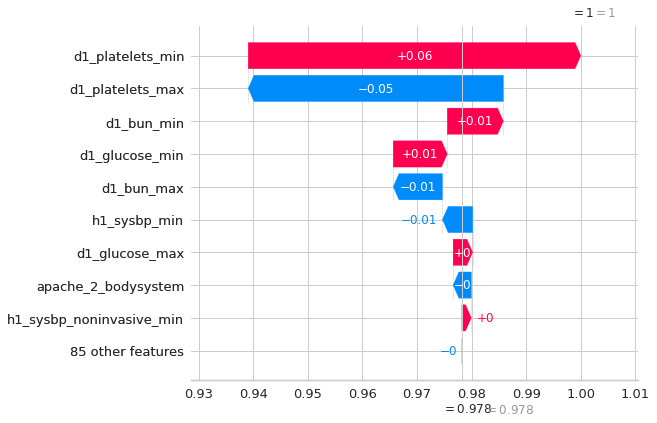

In [146]:
print(test_predictions[10])
row = 10

shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][row], feature_names = X_test_sample.columns)

In [147]:
#shap.plots.heatmap(shap.TreeExplainer(model, data=X_test_sample)(X_test_sample[10][:10]), max_display=14)

SyntaxError: positional argument follows keyword argument (2033725727.py, line 1)

<a name = Section11></a>

---
# **11. Hyperparameter Tuning for Deep learning model**
---

- In this section we will **tune the models**

- Then we will **analyze the results to obtain max accuracy** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy Score** score as required by this project.

In [172]:
import kerastuner as kt
from kerastuner import HyperModel
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers

In [173]:
class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()
        model.add(
            layers.Dense(
                units=hp.Int('units', 8, 64, 4, default=8),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                    #default='sigmoid'),
                input_shape=input_shape
            )
        )
        
        model.add(
            layers.Dense(
                units=hp.Int('units', 16, 64, 4, default=16),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='sigmoid')
            )
        )
        
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        
        model.add(layers.Dense(1))
        
        model.compile(
            optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']
        )
        
        return model

In [174]:
input_shape = (X_train.shape[1],)
hypermodel = RegressionHyperModel(input_shape)

In [175]:
tuner_rs = RandomSearch(
            hypermodel,
            objective='accuracy',
            seed=42,
            max_trials=10,
            executions_per_trial=2)

NameError: name 'RandomSearch' is not defined

In [171]:
tuner_rs.search(x_train_scaled, y_train, epochs=10, validation_split=0.2, verbose=0)

NameError: name 'tuner_rs' is not defined

In [ ]:
best_model = tuner_rs.get_best_models(num_models=1)[0]
loss, accuracy = best_model.evaluate(x_test_scaled, y_test)

<a name = Section12></a>

---
# **12. Model Development & Evaluation using Logistic Regression**
---

- In this section we will **develop a Logistic Regression model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy Score** score as required by this project.

<a name = Section121></a>
### **12.1 Baseline Model Development & Evaluation**

- Here we will develop Logistic Regression classification model using default setting.

In [ ]:
# Instantiate a Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Predicting training and testing labels
y_train_pred_count = logreg.predict(X_train)
y_test_pred_count = logreg.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=logreg, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=logreg, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Training Data', size=14)
ax2.set_title(label='Validation Test Data', size=14)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_test_pred_count)
plt.xlabel('True Values [accident_severity]')
plt.ylabel('Predictions [accident_severity]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred_count))

In [ ]:
confusion_matrix.index = ['Actual 0','Actual 1']
confusion_matrix.columns = ['Predicted 0','Predicted 1']
print(confusion_matrix)

In [ ]:
print('Accuracy score for test validation data is:', accuracy_score(y_test,y_test_pred_count))

In [ ]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Data Report          ')
print(train_report)
print('                    Test Validation Data Report           ')
print(test_report)

In [ ]:
# Class count
count_class_0, count_class_1= df['hospital_death'].value_counts()

# Divide by class
df_class_0 = df[df['hospital_death'] == 0]
df_class_1 = df[df['hospital_death'] == 1]

In [ ]:
df['hospital_death'].value_counts()

<a name = Section13></a>

---
# **13. Hyperparameter Tuning**
---

- In this section we will **tune the models**

- Then we will **analyze the results to obtain max accuracy** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy Score** score as required by this project.

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# K Fold
kf = KFold(shuffle=True, n_splits=5)
cv_results_kfold = cross_val_score(logreg,X_train, y_train, cv=kf, scoring='accuracy')
print(cv_results_kfold)

# Stratified K fold
skf = StratifiedKFold(shuffle=True, n_splits=5)
cv_results_skfold = cross_val_score(logreg, X_train, y_train, cv=skf, scoring='accuracy')
print(cv_results_skfold)

**NOTE**: 
We can start off by tuning the number of neighbors for KNN. The default number of neighbors
is 7. Below we try all odd values of k from 1 to 21, covering the default value of 7. Each k value
is evaluated using 10-fold cross validation on the training standardized dataset

In [ ]:
num_folds = 10
seed = 7
scoring = 'accuracy'
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. In this section we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:
- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).

In [ ]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
model = SVC(C=1.5)
model.fit(X_train, y_train)
ypredictions = model.predict(X_test)
print(accuracy_score(y_test, ypredictions))
#print(confusion_matrix(y_test, ypredictions))
print(classification_report(y_test, ypredictions))
